In [1]:
#Installation des pacakges
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
!pip install pandas
!pip install numpy

In [2]:
import seaborn as sns
import numpy as np #  manip des arrays (tableaux)
import pandas as pd #  manip des dataframes
import matplotlib.pyplot as plt #  construct des graphes : barplot, cammenberts
from sklearn.cluster import KMeans

In [3]:
#loading du data avec pandas
data = pd.read_csv('../data/Summer-Olympic-medals-1976-to-2008.csv', index_col='Event_gender')
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
Event_gender,,,,,,,,,,
W,Montreal,1976.0,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,Silver
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,Bronze
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,Gold
M,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,Silver
W,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,Bronze
...,...,...,...,...,...,...,...,...,...,...
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,Bronze
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,Gold
M,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,Silver


In [4]:
#Verification des lignes vides
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Medal           117
dtype: int64

In [5]:
#Suppression des na
data.dropna(inplace=True)

In [6]:
#Réverification des lignes vides
data.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Medal           0
dtype: int64

In [7]:
data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [8]:
data.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Medal            object
dtype: object

In [9]:
data.describe(include=['O'])

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Medal
count,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,28,41,293,11337,2,128,127,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,Bronze
freq,2042,2210,1523,817,16,9388,1992,1992,5258


In [10]:
# #Conversion de Year en int
# data['Year'] = data['Year'].astype(int)
# #data

In [11]:
# #Nombre de medal par Country
# gold_country = data[data.Medal == 'Gold'].groupby(['Country']).Medal.size()
# # gold_country = list(gold_country)
# # gold_country

In [12]:
# #Nombre de medal par Country
# silver_country = data[data.Medal == 'Silver'].groupby(['Country']).Medal.size()
# # silver_country

In [13]:
# Medals bronze by country
# bronze_country = data[data.Medal == 'Bronze'].groupby(['Country']).Medal.size()
# # silver_country

In [54]:
# #Medal by country
# medals_country = data.groupby(['Country', 'Sport']).Medal.size()
# medals_country.head(10)

In [14]:
# #Top 10 gold
# gold_top_10 = gold_country.sort_values(ascending = False)[:10]
# # gold_top_10

In [15]:
# #Top 10 silver
# silver_top_10 = silver_country.sort_values(ascending = False)[:10]
# # silver_top_10

In [16]:
# #Top 10 bronze
# bronze_top_10 = bronze_country.sort_values(ascending = False)[:10]
# #bronze_top_10

In [25]:
# #Discipline avec plus de Medal
# discipline_medal_count = data.groupby(['Discipline']).Medal.size()
# #discipline_medal_count

In [36]:
# top_athlete = data[data.Medal == 'Gold'].groupby(['Athlete', 'Country']).Medal.size()
# top_athlete = top_athlete[top_athlete>5].sort_values(ascending = False)
# top_athlete = pd.DataFrame(top_athlete).reset_index()
# # top_athlete.columns = ['Athlete', 'Country', 'Gold medals']
# # top_athlete

In [37]:
# aqua = data[data.Sport == 'Aquatics'].groupby(['Country']).Medal.size()
# top_10_aqua = aqua.sort_values(ascending = False)[:10]
# aqua = pd.DataFrame(top_10_aqua).reset_index()
# aqua.columns = ['Country', 'Medals']
# aqua

In [18]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for col in data.columns :
#     if data[col].dtypes == 'object' :
#         data[col] = le.fit_transform(data[col])
        
# # le.fit(data['Medal']);
# # data['Medal'] = le.transform(data['Medal'])

# # le.fit(data['Gender']);
# # data['Gender'] = le.transform(data['Gender'])

# # le.fit(data['Sport']);
# # data['Sport'] = le.transform(data['Sport'])

# # le.fit(data['Country']);
# # data['Country'] = le.transform(data['Country'])
# data

<AxesSubplot:>

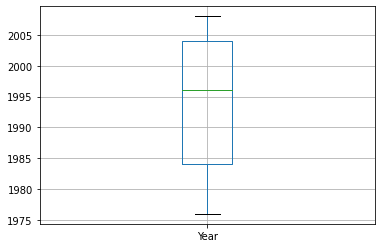

In [19]:
data.boxplot()

In [20]:
corr = data.corr()
corr

,Year
Year,1.0


<AxesSubplot:>

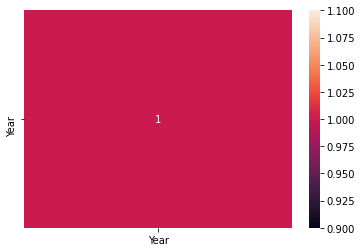

In [21]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

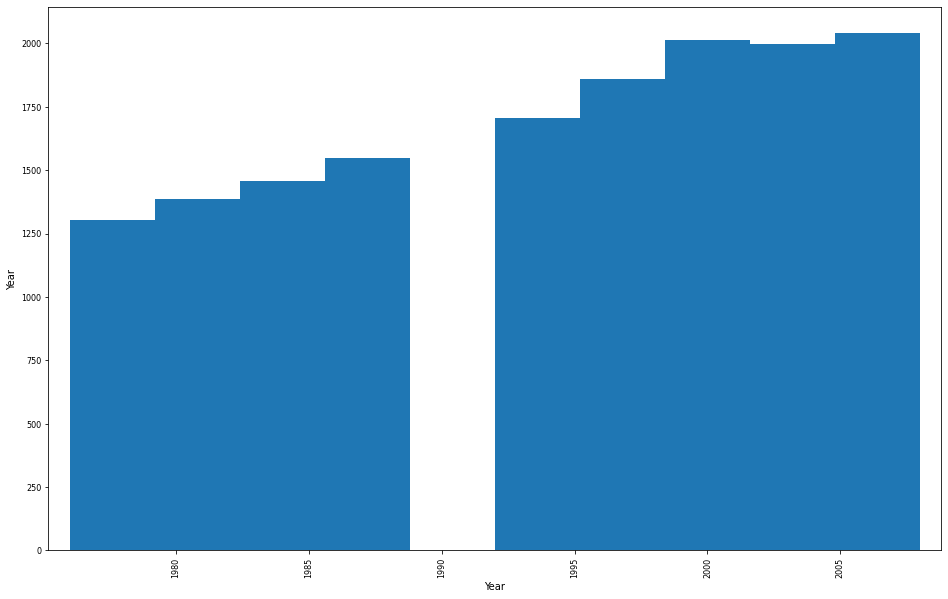

In [22]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(data, figsize = (16,10))

In [23]:
#data = data.filter(['Sport','Medal','Gender','Year', 'Country'], axis=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(data)
df_minmax = pd.DataFrame(df_minmax, columns=data.columns, index=data.index)
df_minmax.boxplot()

ValueError: could not convert string to float: 'Montreal'

In [ ]:
df_minmax

In [ ]:
pd.DataFrame(df_minmax,columns=data.columns)
df_minmax.shape

In [ ]:
scatter_mat = scatter_matrix(df_minmax, figsize = (16,10))


In [ ]:
# # kmeans sur le df remis à l'échelle df_minmax

# km_minmax = KMeans(n_clusters=3, random_state=0)
# km_minmax.fit(df_minmax)

In [ ]:
# km_minmax.labels_